1)

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
X,Y= make_moons(n_samples=10000,noise=0.4)
print(X[:2],'\n**************\n',Y[:2])

[[0.21131952 0.19769981]
 [1.84933348 0.06588778]] 
**************
 [0 1]


In [2]:
pd.Series(Y).value_counts()

0    5000
1    5000
Name: count, dtype: int64

Lets see how the data set looks like

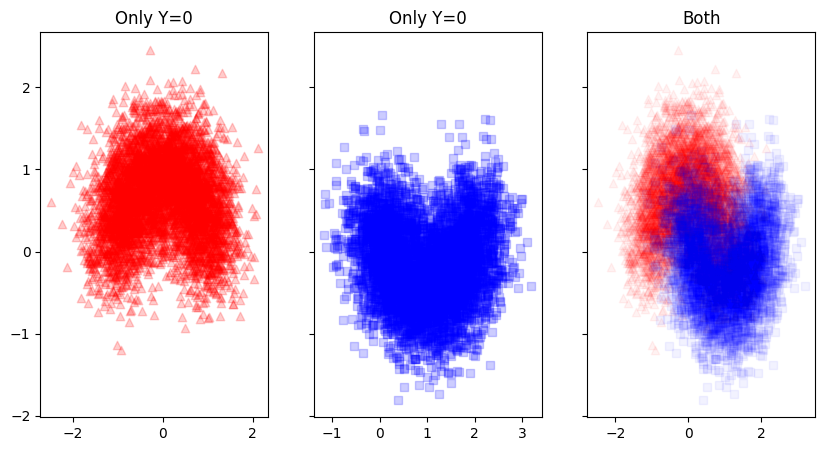

In [3]:
fig,axs=plt.subplots(ncols=3,sharey=True,figsize=(10,5))

plt.sca(axs[0])
plt.title("Only Y=0")
plt.scatter(X[:,0][Y==0],X[:,1][Y==0],color="red",marker='^',alpha=0.2)

plt.sca(axs[1])
plt.title("Only Y=0")
plt.scatter(X[:,0][Y==1],X[:,1][Y==1],color="blue",marker='s',alpha=0.2)

plt.sca(axs[2])
plt.title("Both")
plt.scatter(X[:,0][Y==0],X[:,1][Y==0],color="red",marker='^',alpha=0.05)
plt.scatter(X[:,0][Y==1],X[:,1][Y==1],color="blue",marker='s',alpha=0.05)

plt.show()


the data are largely overlapped but not at the exact co-ordinates. this is due to larget value of noise at: X,Y= make_moons(n_samples=10000,noise=0.4)


choosing the best parameters for Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
params={
    'max_depth': [5,10,15,20,25],
    'min_samples_split': [2,6,10],
    'min_samples_leaf': [1,5,9],
    'max_features': [1,5,9],
    'max_leaf_nodes':[5,10,15,20,25] 
}
gs=GridSearchCV(estimator=dtc,param_grid=params,cv=3)

In [27]:
gs.fit(X,Y)
model = gs.best_estimator_
print("Best_Params:",gs.best_params_)
print("Best_Score=",gs.best_score_)

Best_Params: {'max_depth': 20, 'max_features': 1, 'max_leaf_nodes': 25, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best_Score= 0.8568999371442843


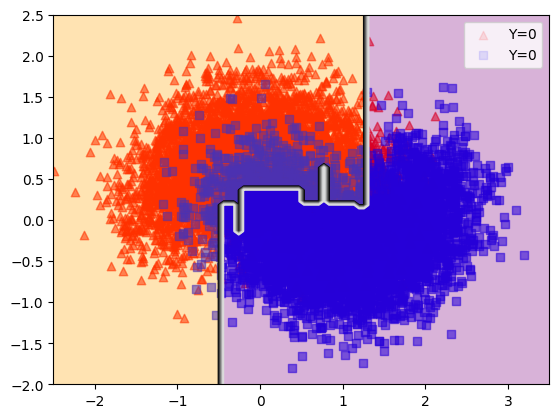

In [28]:
plt.scatter(X[:,0][Y==0],X[:,1][Y==0],color="red",marker='^',alpha=0.1,label="Y=0")
plt.scatter(X[:,0][Y==1],X[:,1][Y==1],color="blue",marker='s',alpha=0.1,label="Y=0")
X1,X2=np.meshgrid(np.linspace(-2.5,3.5,100),np.linspace(-2,2.5,100))
X_new=np.c_[X1.ravel(),X2.ravel()]
pred_new = model.predict(X_new).reshape(X1.shape)
plt.scatter(X[:,0][Y==0],X[:,1][Y==0],color="red",marker='^',alpha=0.5)
plt.scatter(X[:,0][Y==1],X[:,1][Y==1],color="blue",marker='s',alpha=0.5)
plt.contourf(X1,X2,pred_new,cmap=ListedColormap(['orange','purple']),alpha=0.3)
plt.legend()
plt.contour(X1,X2,pred_new,cmap="grey")
plt.show()


As we can see above that the one orange region is for Y==0 and purple region is for Y==1

2) 

In [ ]:
from sklearn.model_selection import ShuffleSplit
trainXs=[],
trainYs=[]
testx=[]
testy=[]
trees=[]
splitter = ShuffleSplit(n_splits=1000,test_size=0.1,)